In [269]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#匯入訓練集
train_data = pd.read_csv('adult.data', header=None) # 如果資料檔案沒有列標題，則將 header 參數設為 None
#更改欄位名稱

train_data.columns = ['age', 'workclass','fnlwgt','education','education-num','marital-status',
                       'occupation','relationship','race','sex','capital-gain','capital-loss',
                      'hours-per-week','native-country','income']

#匯入測試集
test_data = pd.read_csv('adult.test', header=None,skiprows=1)  # 如果資料檔案沒有列標題，則將 header 參數設為 None
#更改欄位名稱

test_data.columns = ['age', 'workclass','fnlwgt','education','education-num','marital-status',
                      'occupation','relationship','race','sex','capital-gain','capital-loss',
                     'hours-per-week','native-country','income']

#處理缺失值

#訓練集
#已知有缺失值欄位為"workclass","occupation","native-country"
missing_columns = ['workclass', 'occupation', 'native-country']
#將"?"取代成NaN
train_data.replace(" ?", np.nan, inplace=True)
#計算名目資料的眾數
column_modes = train_data[missing_columns].mode().iloc[0]
#使用眾數填充缺失值
train_data.fillna(column_modes, inplace=True)

#測試集
#已知有缺失值欄位為"workclass","occupation","native-country"
missing_columns = ['workclass', 'occupation', 'native-country']
#將"?"取代成NaN
test_data.replace(" ?", np.nan, inplace=True)
#計算名目資料的眾數
column_modes = test_data[missing_columns].mode().iloc[0]
#使用眾數填充缺失值
test_data.fillna(column_modes, inplace=True)

In [270]:
#檢查缺失值
train_data_missing = train_data.isnull().sum()
test_data_missing = train_data.isnull().sum()
print(train_data_missing)
print("----------------")
print(test_data_missing)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
----------------
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [271]:
#檢查兩個資料集的"income"欄位
unique_values = train_data['income'].unique()
print(unique_values)

unique_values = test_data['income'].unique()
print(unique_values)

[' <=50K' ' >50K']
[' <=50K.' ' >50K.']


In [272]:
# income欄位處理
income_mapping = {
     " >50K": ">50K",
    " >50K.": ">50K",
    " <=50K": "<=50K",
    " <=50K.": "<=50K"
}
for column in ['income']:
    train_data[column] = train_data[column].replace(income_mapping)
    test_data[column] = test_data[column].replace(income_mapping)

In [273]:
# 進行編碼，將名目資料轉成數值資料
from sklearn.preprocessing import LabelEncoder

# 訓練集進行 Label Encoding 的列名
columns_to_encode = ['sex','workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'income']

# 建立 LabelEncoder 對象
label_encoder = LabelEncoder()

# 對指定欄位進行 Label Encoding，並將結果取代原始數據
encoded_data = train_data.copy() # 複製原始數據，避免修改原始數據
for column in columns_to_encode:
     # 對目前列進行 Label Encoding
     encoded_column = label_encoder.fit_transform(train_data[column])
     # 將 Label 編碼後的結果取代原始資料中的對應列
     encoded_data[column] = encoded_column

# 替換原始數據
train_data = encoded_data

from sklearn.preprocessing import LabelEncoder

# 測試集進行 Label Encoding 的列名
columns_to_encode = ['sex', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'income']

# 建立 LabelEncoder 對象
label_encoder = LabelEncoder()

# 對指定欄位進行 Label Encoding，並將結果取代原始數據
encoded_data = test_data.copy() # 複製原始數據，避免修改原始數據
for column in columns_to_encode:
     # 對目前列進行 Label Encoding
     encoded_column = label_encoder.fit_transform(test_data[column])
     # 將 Label 編碼後的結果取代原始資料中的對應列
     encoded_data[column] = encoded_column

# 替換原始數據
test_data = encoded_data

In [274]:
#查看資料情況，確認資料類型轉換完成
train_data.info()
print("---------------------------------------------------")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to

In [275]:
train_data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,1.897784e+05,10.298210,10.080679,2.611836,6.138755,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.417155,0.240810
std,13.640433,1.107194,1.055500e+05,3.870264,2.572720,1.506222,3.972708,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.056047,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [276]:
#移除無關欄位(fnlwgt、capital-gain、capital-loss)
train_data.drop('fnlwgt', axis = 1, inplace = True)
train_data.drop('capital-gain', axis = 1, inplace = True)
train_data.drop('capital-loss', axis = 1, inplace = True)

test_data.drop('fnlwgt', axis = 1, inplace = True)
test_data.drop('capital-gain', axis = 1, inplace = True)
test_data.drop('capital-loss', axis = 1, inplace = True)

# 切割特徵和目標
X_train = train_data.drop("hours-per-week", axis=1)  # 删除 "hours-per-week" 列，得到特徵
y_train = train_data["hours-per-week"]  # 目標為 "hours-per-week" 列
# 測試集
X_test = train_data.drop("hours-per-week", axis=1)  # 删除 "hours-per-week" 列，得到特徵
y_test = train_data["hours-per-week"]  # 目標為 "hours-per-week" 列

In [277]:
# 針對 訓練集 和 測試集的特徵值做正規化 & 標準化
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

204/204 [==============================] - 0s 1ms/step
Total time elapsed: 58.665690898895264 seconds
Mean Train Loss: 123.19128027486477
Mean Train MAE: 7.687469902355128
Mean Train MAPE: 32.45173123156045
Mean Train RMSE: 11.098780444685524
----------------------------------
Mean Test Loss: 124.89911821900348
Mean Test MAE: 7.737242356547954
Mean Test MAPE: 32.64941398465644
Mean Test RMSE: 11.175263108333242


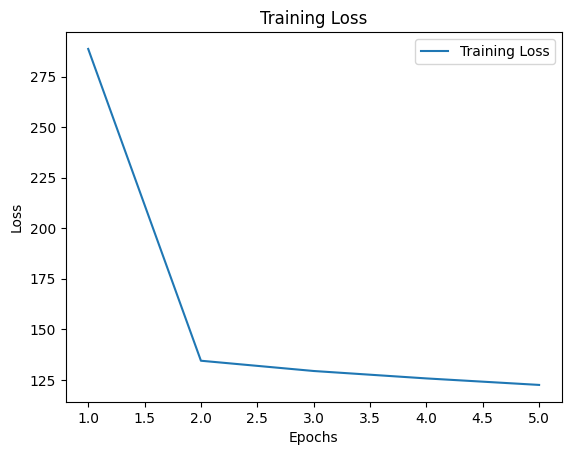

In [278]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# 建立模型
def build_regularized_model():
     model = Sequential([
         layers.Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
         layers.Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
         layers.Dense(1)
     ])
     model.compile(optimizer="adam", loss="mse")
     return model

# 定義 mean_absolute_percentage_error 函數
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.squeeze(y_true)
    y_pred = np.squeeze(y_pred)
    non_zero_indices = y_true != 0
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100


# 準備資料集
X = X_train  # 特徵數據
y = y_train  # 目標數據

# 選擇 k 折交叉驗證策略
k = 5  # 5 折交叉驗證
kf = KFold(n_splits=k, shuffle=True)

# 執行交叉驗證
all_train_losses = []
all_train_mae = []
all_train_mape = []
all_train_rmse = []

all_test_losses = []
all_test_mae = []
all_test_mape = []
all_test_rmse = []

start_time = time.time()  # 計時開始
# 最終測試
for train_index, test_index in kf.split(X):
    # 建立模型
    model = build_regularized_model()

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 訓練模型
    history = model.fit(X_train, y_train, epochs=5, batch_size=32  , verbose=0)

    # 評估模型表現 - 訓練集
    y_train_pred = model.predict(X_train)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_loss)

    all_train_losses.append(train_loss)
    all_train_mae.append(train_mae)
    all_train_mape.append(train_mape)
    all_train_rmse.append(train_rmse)

    # 評估模型效能 - 測試集
    y_test_pred = model.predict(X_test)
    test_loss = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_loss)

    all_test_losses.append(test_loss)
    all_test_mae.append(test_mae)
    all_test_mape.append(test_mape)
    all_test_rmse.append(test_rmse)

# 計算訓練集和測試集上的平均表現指標
mean_train_loss = np.mean(all_train_losses)
mean_train_mae = np.mean(all_train_mae)
mean_train_mape = np.mean(all_train_mape)
mean_train_rmse = np.mean(all_train_rmse)

mean_test_loss = np.mean(all_test_losses)
mean_test_mae = np.mean(all_test_mae)
mean_test_mape = np.mean(all_test_mape)
mean_test_rmse = np.mean(all_test_rmse)

end_time = time.time()  # 計時結束
elapsed_time = end_time - start_time  # 經過時間
print("Total time elapsed:", elapsed_time, "seconds")

print("Mean Train Loss:", mean_train_loss)
print("Mean Train MAE:", mean_train_mae)
print("Mean Train MAPE:", mean_train_mape)
print("Mean Train RMSE:", mean_train_rmse)
print("----------------------------------")
print("Mean Test Loss:", mean_test_loss)
print("Mean Test MAE:", mean_test_mae)
print("Mean Test MAPE:", mean_test_mape)
print("Mean Test RMSE:", mean_test_rmse)

# 繪製訓練集的 loss 與 epoch 圖表
loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [279]:
# 設定要列印的行數
num_rows_to_print = 10

# 使用訓練好的模型對測試集進行預測
predictions = model.predict(X_test)

# 列印實際值和預測值
print("實際值\t\t預測值")
for i in range(num_rows_to_print):
    print(f"{y_test.iloc[i]}\t{predictions[i][0]}")

204/204 [==============================] - 0s 1ms/step
實際值		預測值
40	41.778221130371094
40	39.373504638671875
16	34.96302795410156
80	45.17853927612305
40	46.875755310058594
52	40.31116485595703
40	40.234336853027344
43	44.64463424682617
40	43.1445426940918
40	47.87335968017578
